# **Chapter 3: Named Entity Recognition or NER**

This is a step in NLP that is used to identify named entities in a corpus. 
This might include things such as:
1. People, organizations, places
2. Dates, states
3. Work of arts and other categories

There are a number of libraries that one can use for NER, among them:
* Stanford coreNLP
* NLTK

## **NER with NLTK**

   
>  Tokenize article into sentences.
>
> Tokenize each sentence in sentences into words using a list comprehension.
>
> Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().
>
> Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents().
>
> Along with pos_sentences, specify the additional keyword argument binary=True.
>
> Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE". If so, print that chunk.



In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag                   #to tag the part of a tokenized sentences

from nltk.chunk import ne_chunk_sents    


articles = """'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to
have a moral character. 
If any human being were to behave with the single-minded and ruthless greed of the company, 
we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, 
and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, 
to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, 
this use of it was not something the users had bargained for. 
Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, 
attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, 
that they pay their taxes fairly and that they behave responsibly."""

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(articles)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [pos_tag(sent) for sent in token_sentences] 
print(pos_sentences)

# Create the named entity chunks: chunked_sentences
chunked_sentences = ne_chunk_sents(pos_sentences, binary = True)


# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


[[("'The", 'POS'), ('taxi-hailing', 'JJ'), ('company', 'NN'), ('Uber', 'NNP'), ('brings', 'VBZ'), ('into', 'IN'), ('very', 'RB'), ('sharp', 'JJ'), ('focus', 'VB'), ('the', 'DT'), ('question', 'NN'), ('of', 'IN'), ('whether', 'IN'), ('corporations', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('said', 'VBD'), ('to', 'TO'), ('have', 'VB'), ('a', 'DT'), ('moral', 'JJ'), ('character', 'NN'), ('.', '.')], [('If', 'IN'), ('any', 'DT'), ('human', 'JJ'), ('being', 'VBG'), ('were', 'VBD'), ('to', 'TO'), ('behave', 'VB'), ('with', 'IN'), ('the', 'DT'), ('single-minded', 'JJ'), ('and', 'CC'), ('ruthless', 'JJ'), ('greed', 'NN'), ('of', 'IN'), ('the', 'DT'), ('company', 'NN'), (',', ','), ('we', 'PRP'), ('would', 'MD'), ('consider', 'VB'), ('them', 'PRP'), ('sociopathic', 'JJ'), ('.', '.')], [('Uber', 'NNP'), ('wanted', 'VBD'), ('to', 'TO'), ('know', 'VB'), ('as', 'RB'), ('much', 'JJ'), ('as', 'IN'), ('possible', 'JJ'), ('about', 'IN'), ('the', 'DT'), ('people', 'NNS'), ('who', 'WP'), ('use', 'VBP'), ('i

### **Charting practice**




> In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.
>
> You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type.
>
> You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.



   
>  Fill up the dictionary with values for each of the keys. Remember, the keys will represent the label().        In the outer for loop, iterate over chunked_sentences, using sent as your iterator variable.
>
> In the inner for loop, iterate over sent.
>
> If the condition is true, increment the value of each key by 1.
>
> Remember to use the chunk's .label() method as the key!    For the pie chart labels, create a list called labels from the keys of ner_categories, which can be accessed using .keys().



   
>  Use a list comprehension to create a list called values, using the .get() method on ner_categories to compute the values of each label v.
>
>  Use plt.pie() to create a pie chart for each of the NER categories. Along with values and labels=labels, pass the extra keyword arguments autopct='%1.1f%%' and startangle=140 to add percentages to the chart and rotate the initial start angle.
>
> This step has been done for you.    Display your pie chart. Was the distribution what you expected?


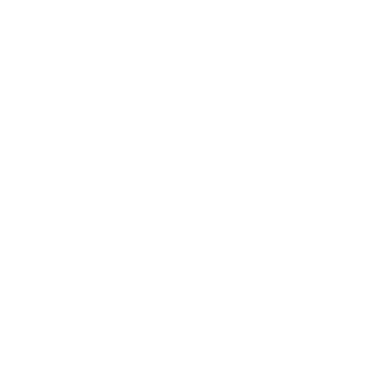

In [5]:
from collections import defaultdict
from matplotlib import pyplot as plt
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()